## Importing libraries and data

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
train=pd.read_csv('train_v9rqX0R.csv')
test=pd.read_csv('test_AbJTz2l.csv')
sample=pd.read_csv('sample_submission_8RXa3c6.csv')

In [4]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [7]:
sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Item_Identifier    5681 non-null   object
 1   Outlet_Identifier  5681 non-null   object
 2   Item_Outlet_Sales  5681 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 133.3+ KB


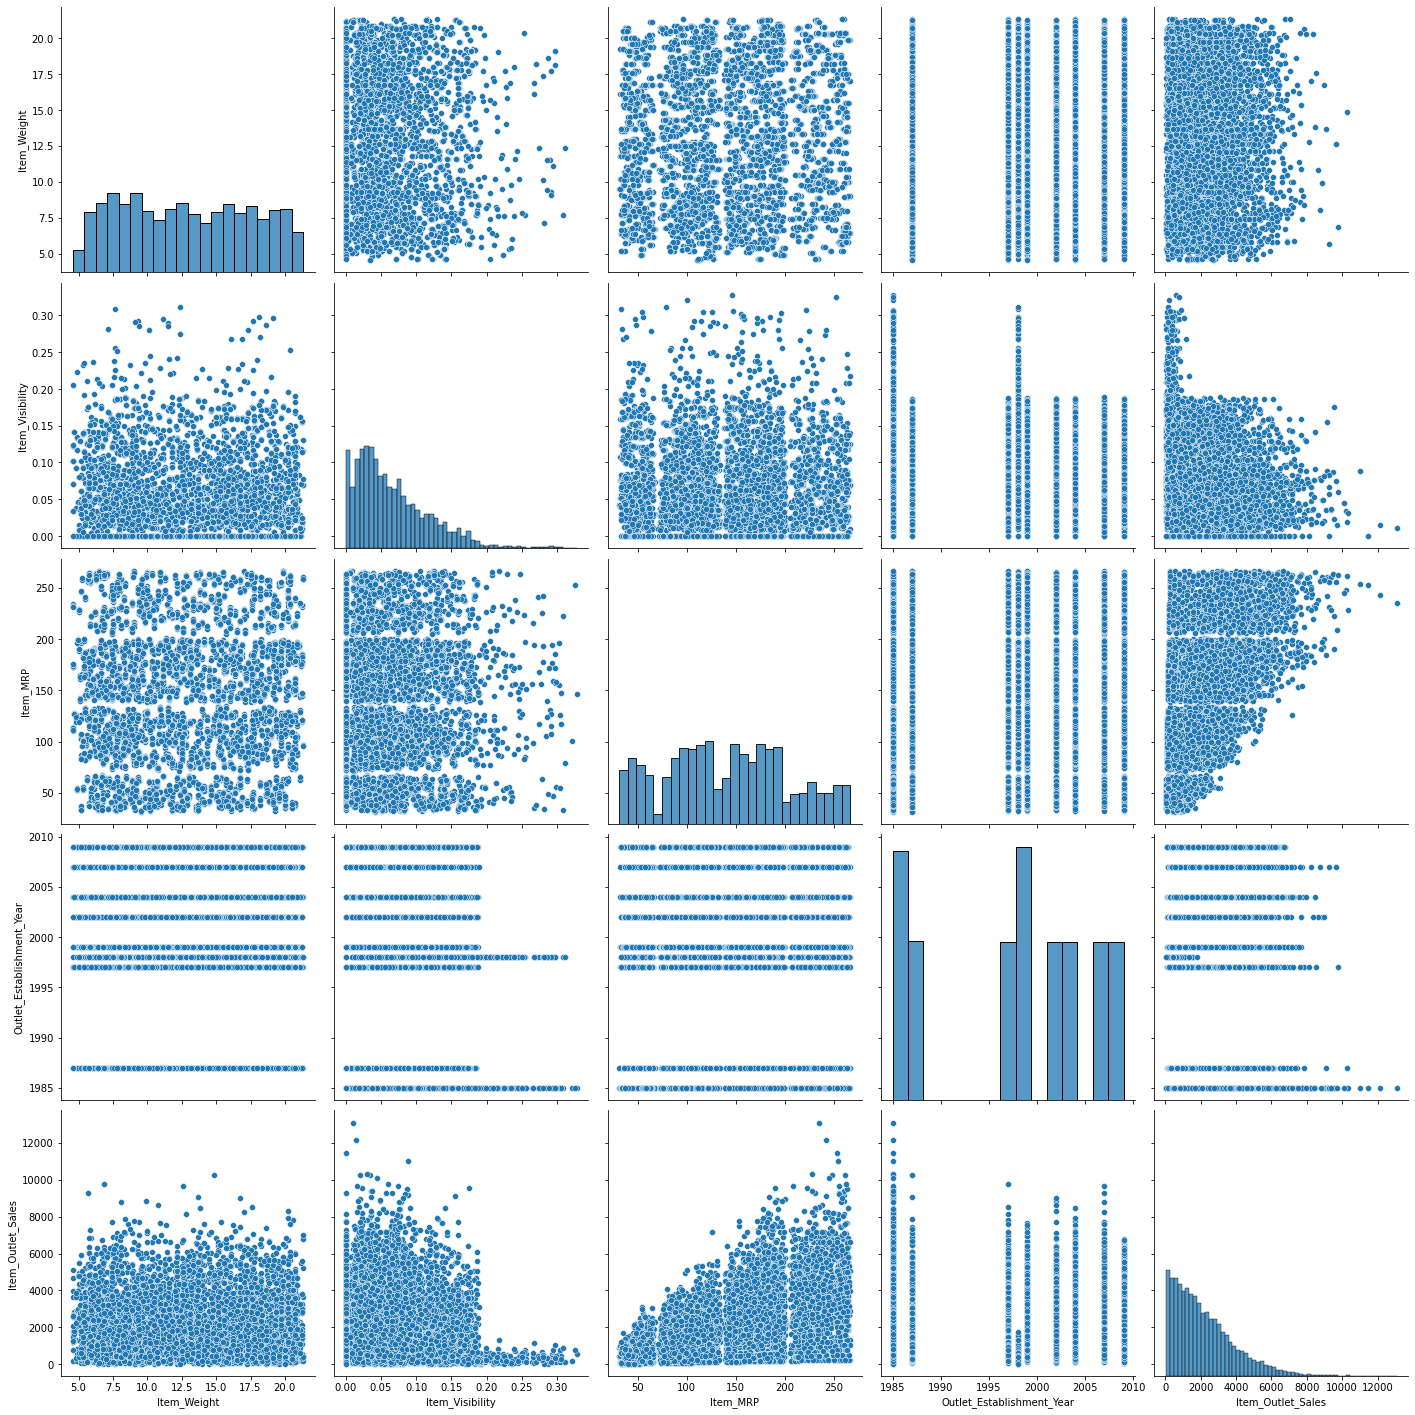

In [8]:
sns.pairplot(data=train,height=4)

In [9]:
train.select_dtypes(['O'])

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
3,FDX07,Regular,Fruits and Vegetables,OUT010,NaN,Tier 3,Grocery Store
4,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1
...,...,...,...,...,...,...,...
8518,FDF22,Low Fat,Snack Foods,OUT013,High,Tier 3,Supermarket Type1
8519,FDS36,Regular,Baking Goods,OUT045,NaN,Tier 2,Supermarket Type1
8520,NCJ29,Low Fat,Health and Hygiene,OUT035,Small,Tier 2,Supermarket Type1
8521,FDN46,Regular,Snack Foods,OUT018,Medium,Tier 3,Supermarket Type2


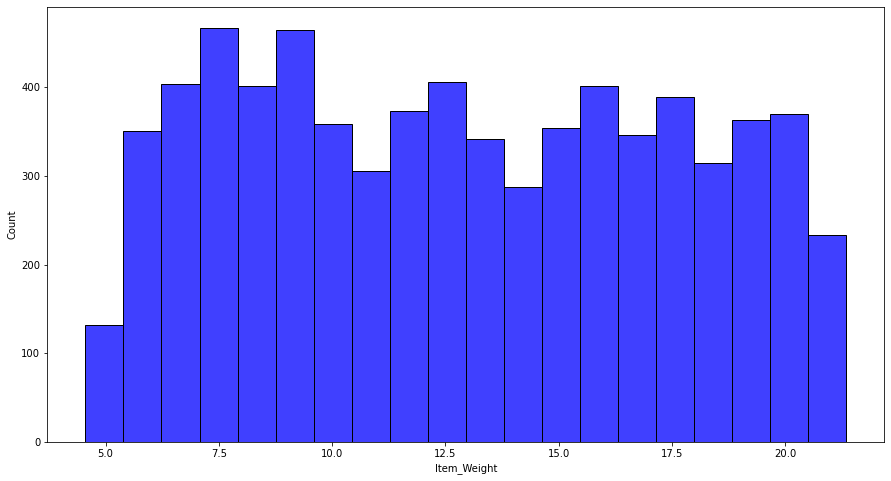

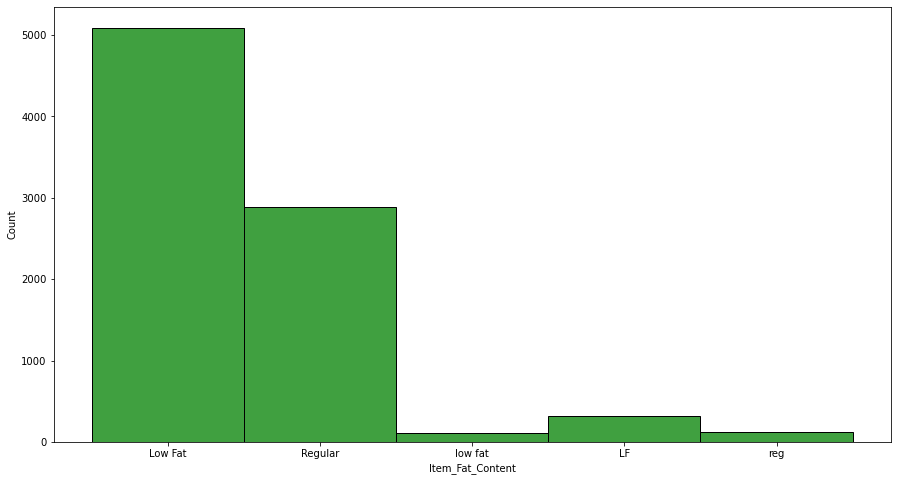

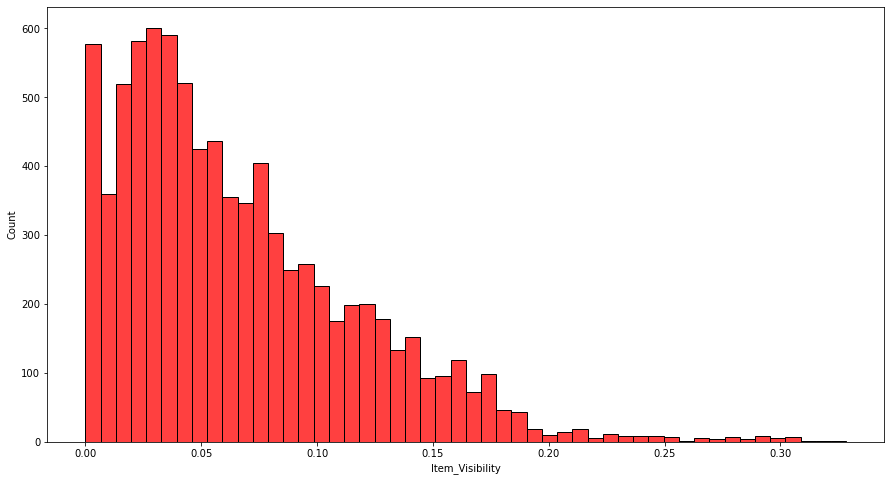

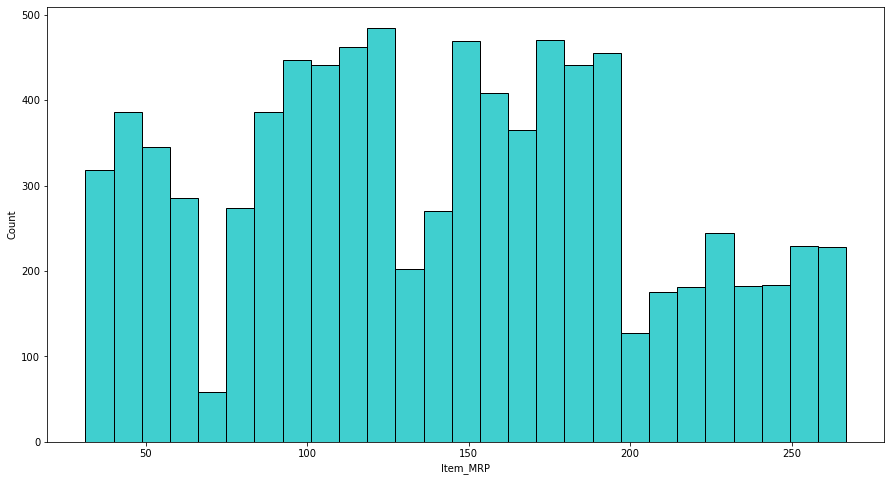

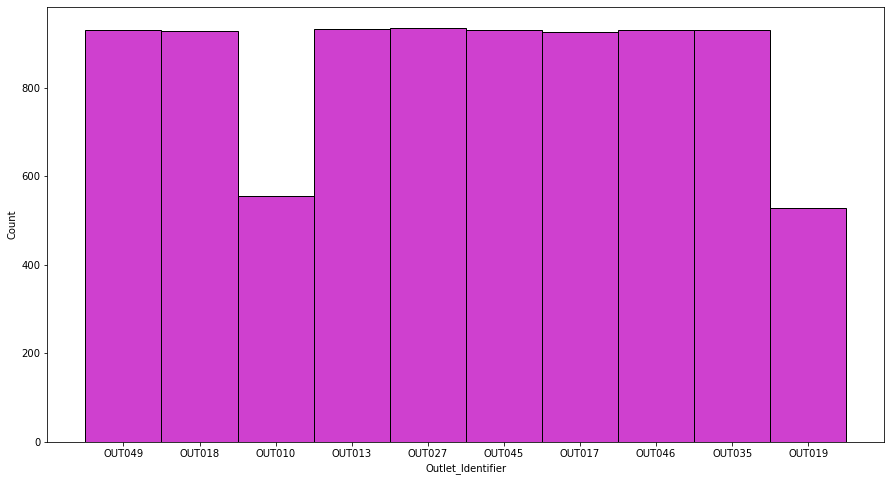

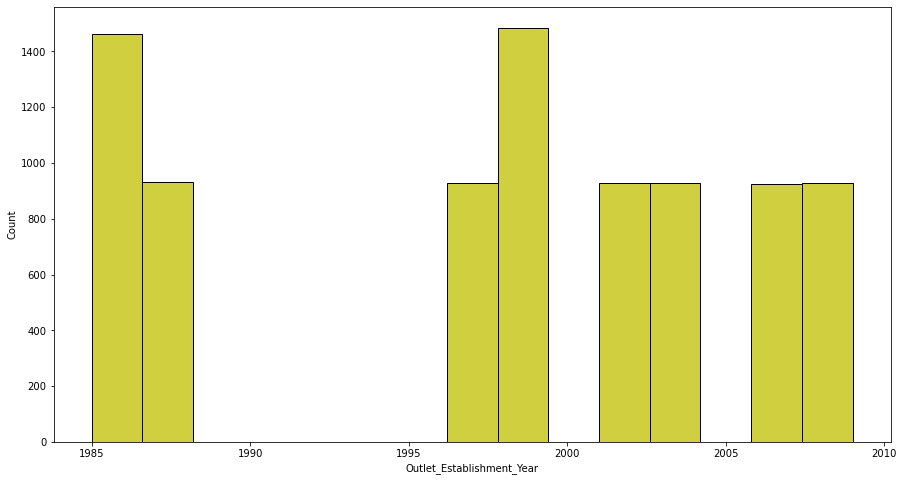

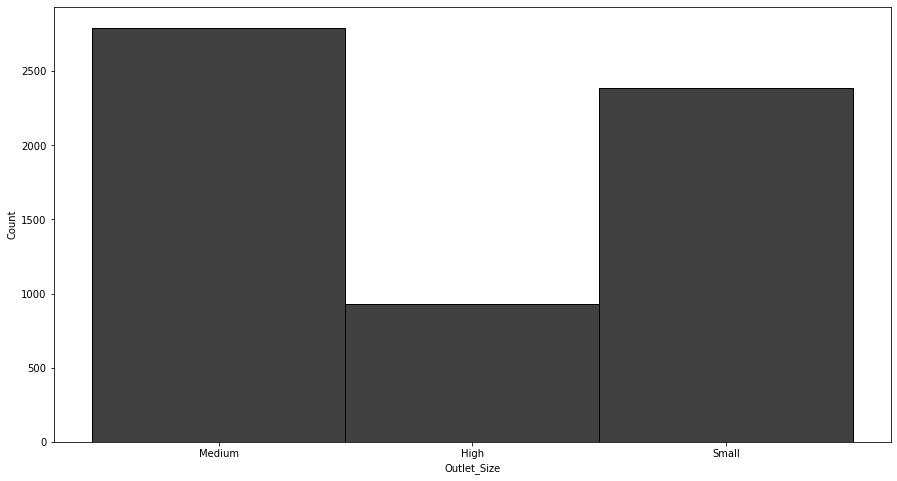

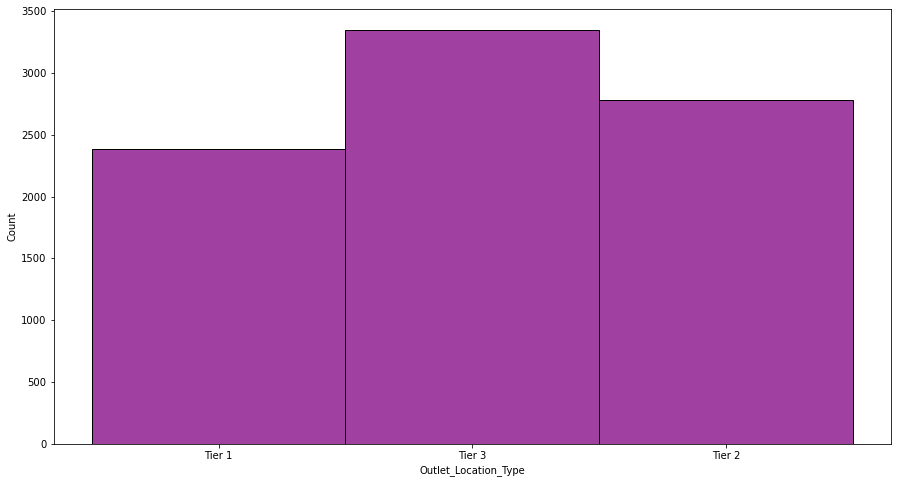

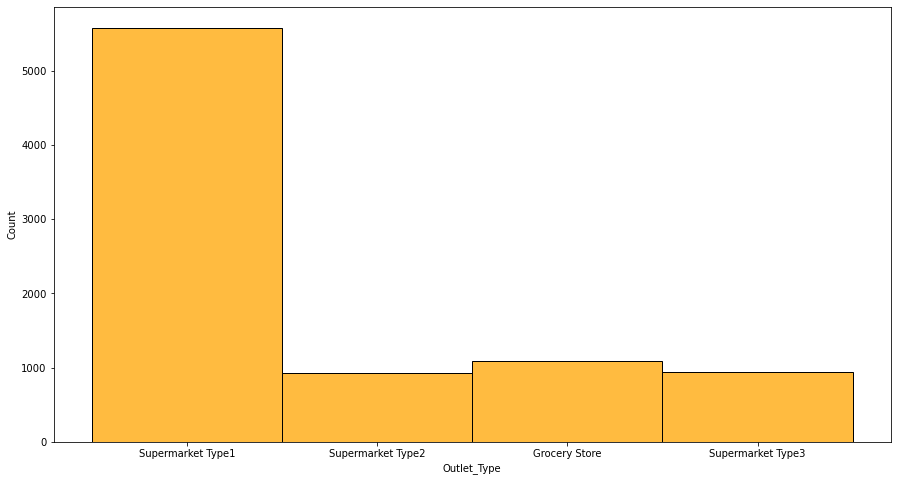

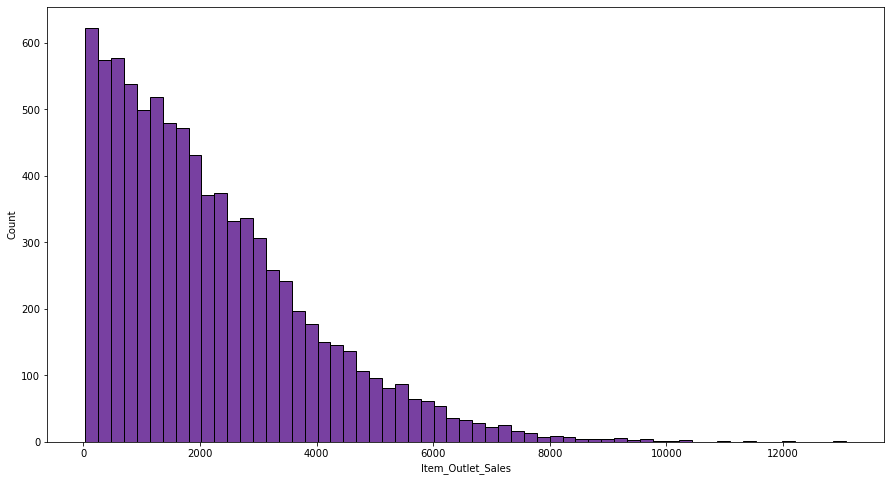

In [10]:
colors=['b','g','r','c','m','y','k','purple','orange','indigo']
for i,col in enumerate(train.drop(['Item_Identifier','Item_Type'],axis=1).columns):
    plt.figure(figsize=(15,8))
    sns.histplot(x=col,data=train,color=colors[i])
    plt.show()

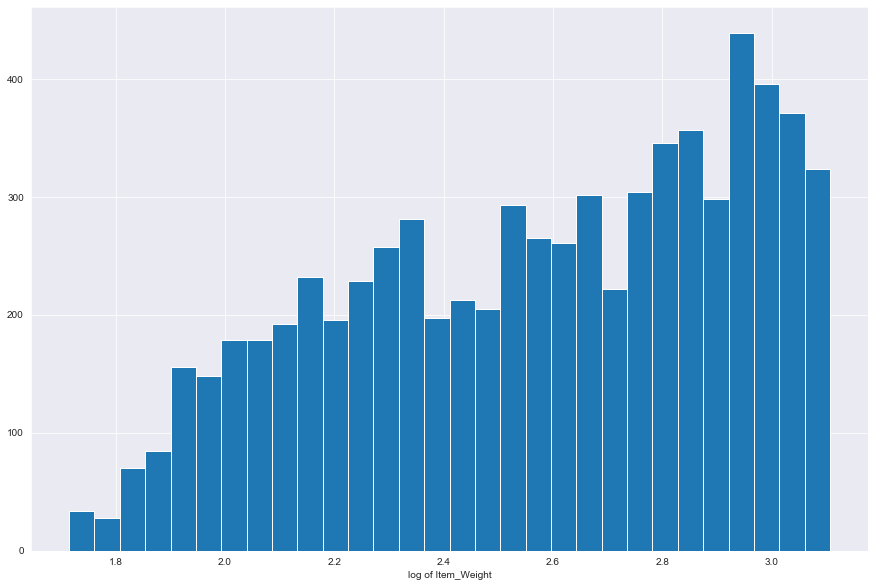

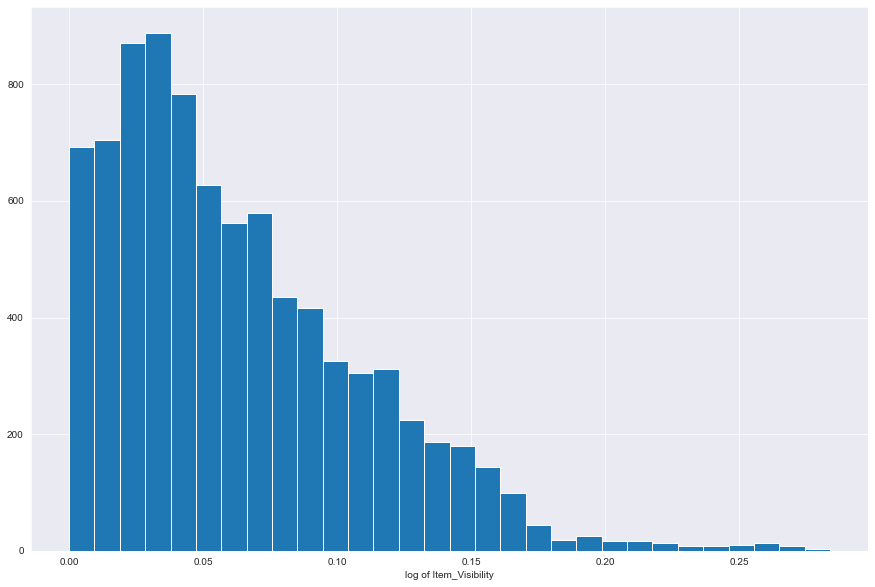

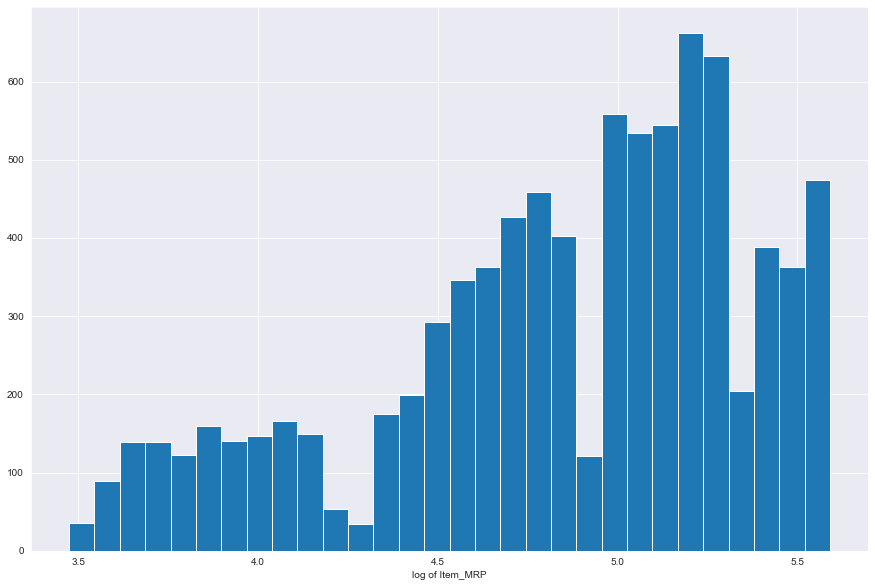

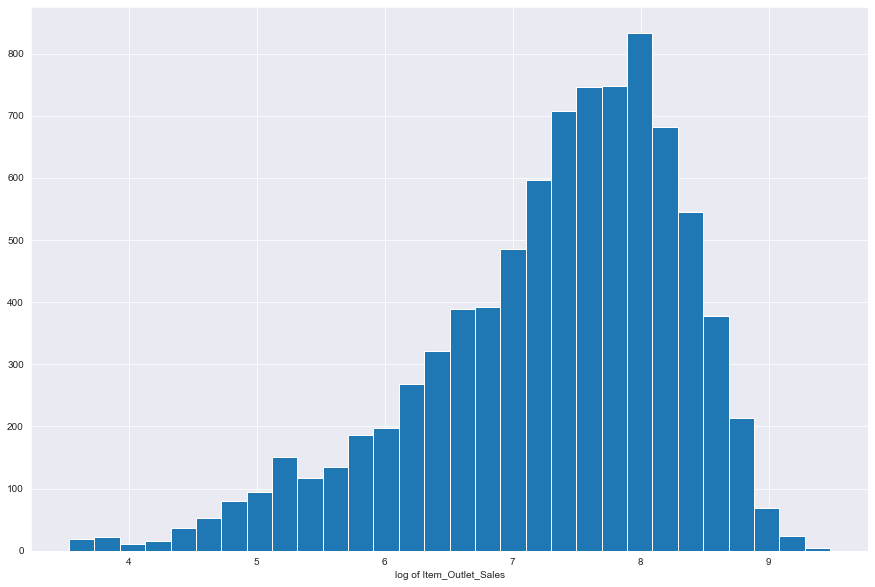

In [11]:
for col in train.drop('Item_Identifier',axis=1).columns:
    if train[col].nunique()>40:
        sns.set_style('darkgrid')
        plt.figure(figsize=(15,10))
        train[col].apply(np.log1p).hist(bins=30)
        plt.xlabel('log of '+col)

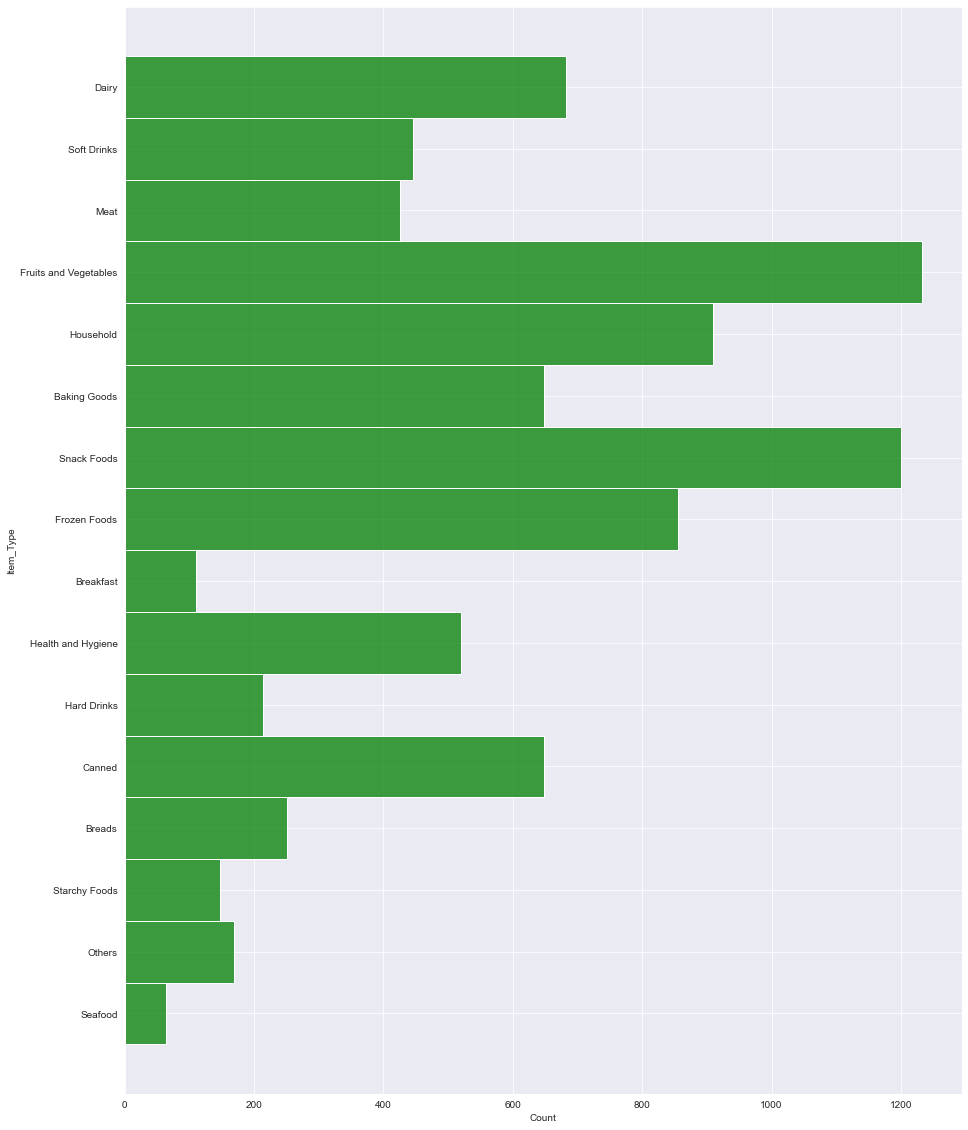

In [12]:
plt.figure(figsize=(15,20))
sns.histplot(y='Item_Type',data=train,color='green')
plt.show()

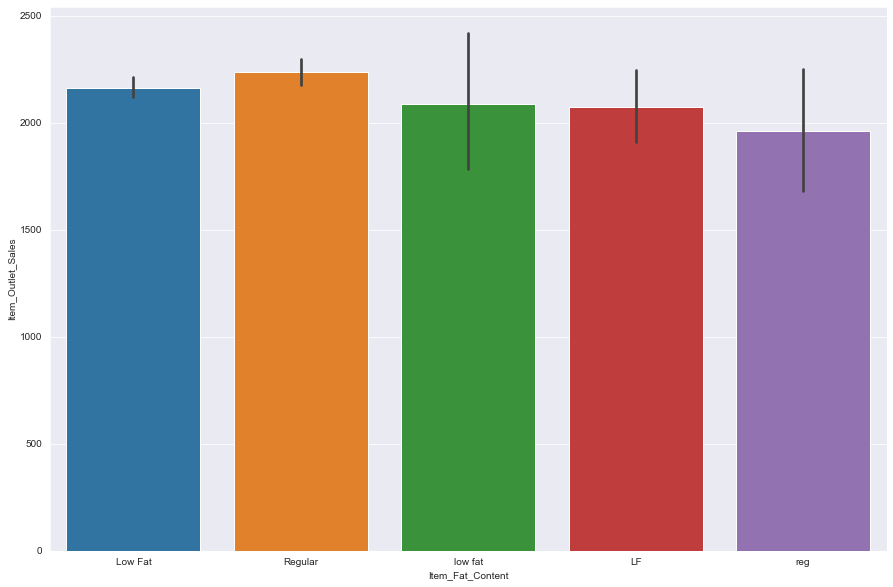

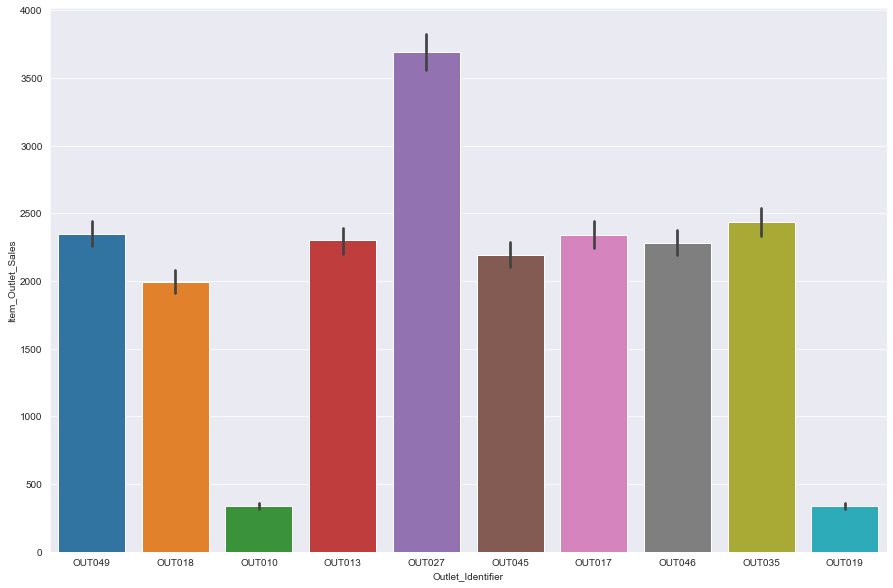

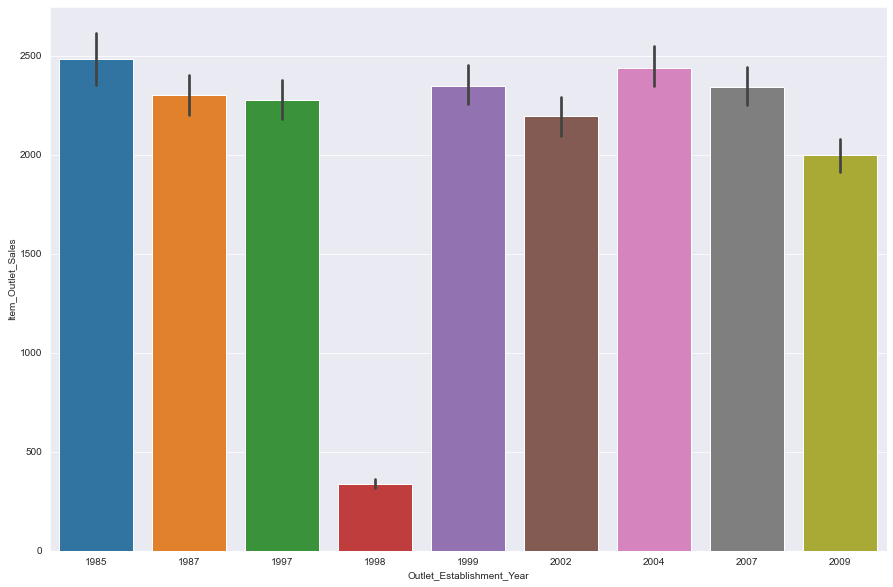

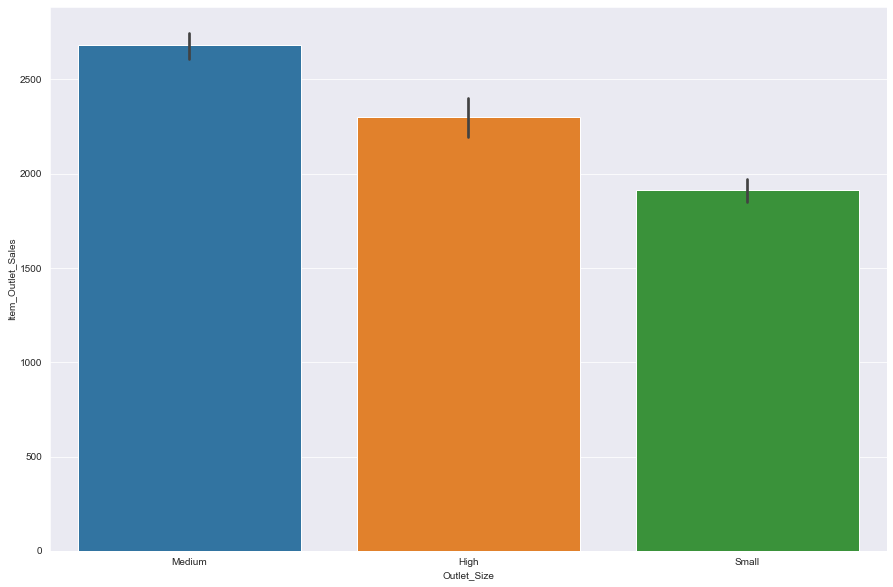

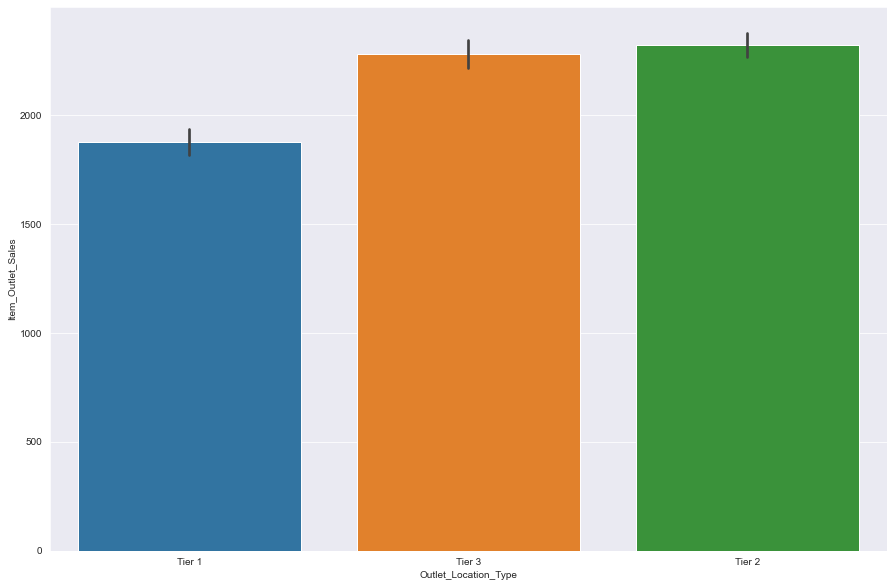

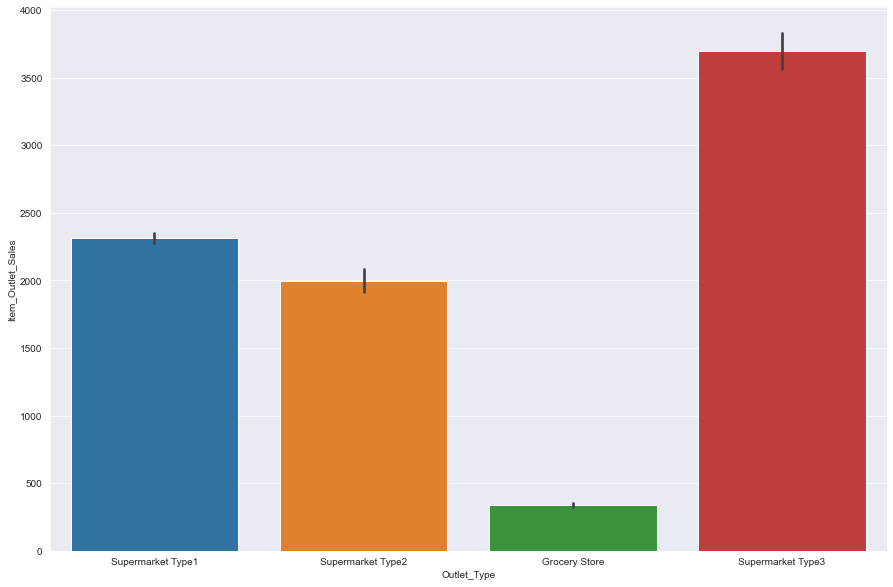

In [13]:
for i,col in enumerate(train.columns):
    if train[col].nunique()<15:
        plt.figure(figsize=(15,10))
        sns.barplot(x=col,y='Item_Outlet_Sales',data=train,estimator=np.mean)
        plt.show()

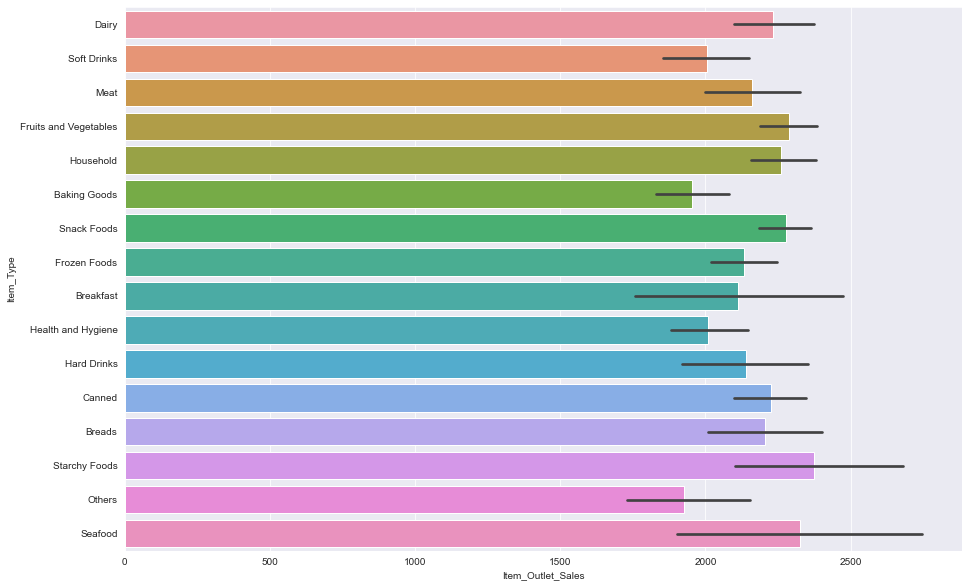

In [14]:
plt.figure(figsize=(15,10))
sns.barplot(y='Item_Type',x='Item_Outlet_Sales',data=train,estimator=np.mean)
plt.show()

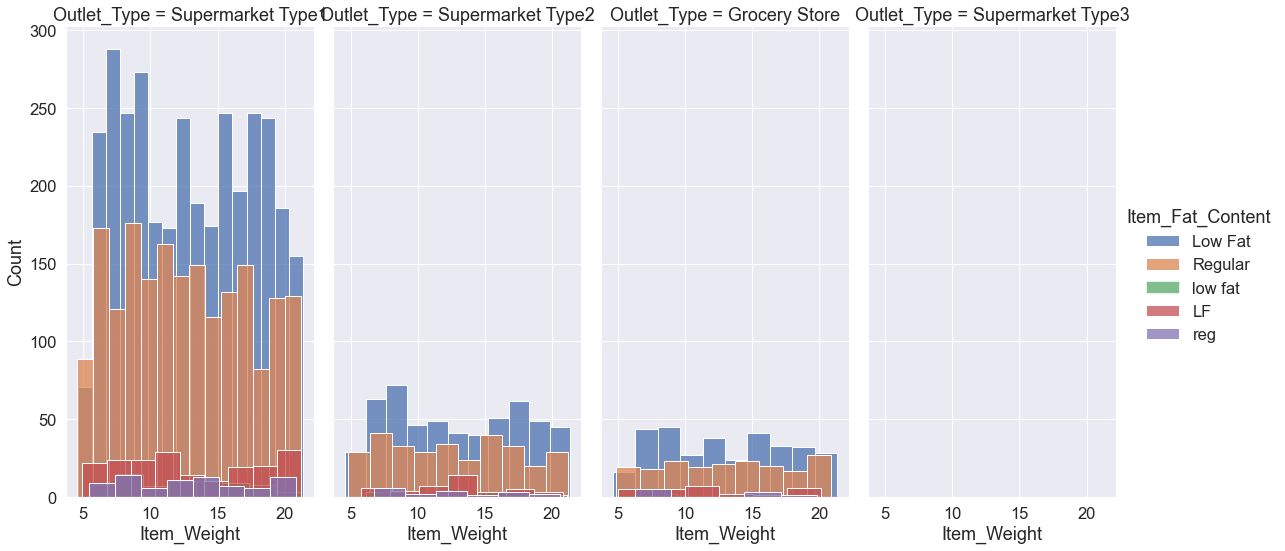

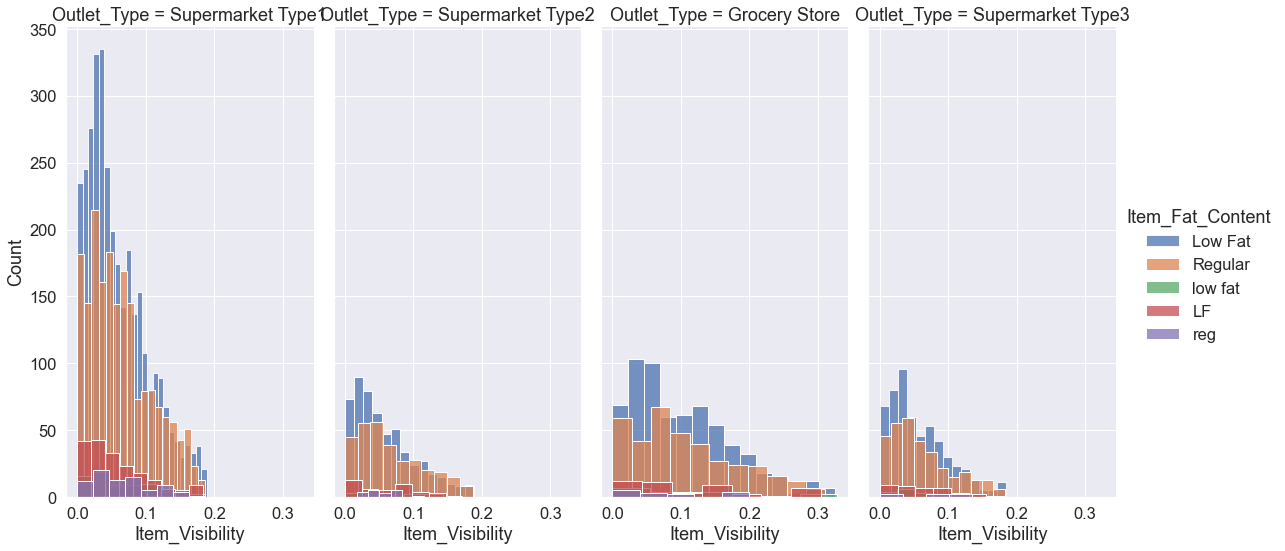

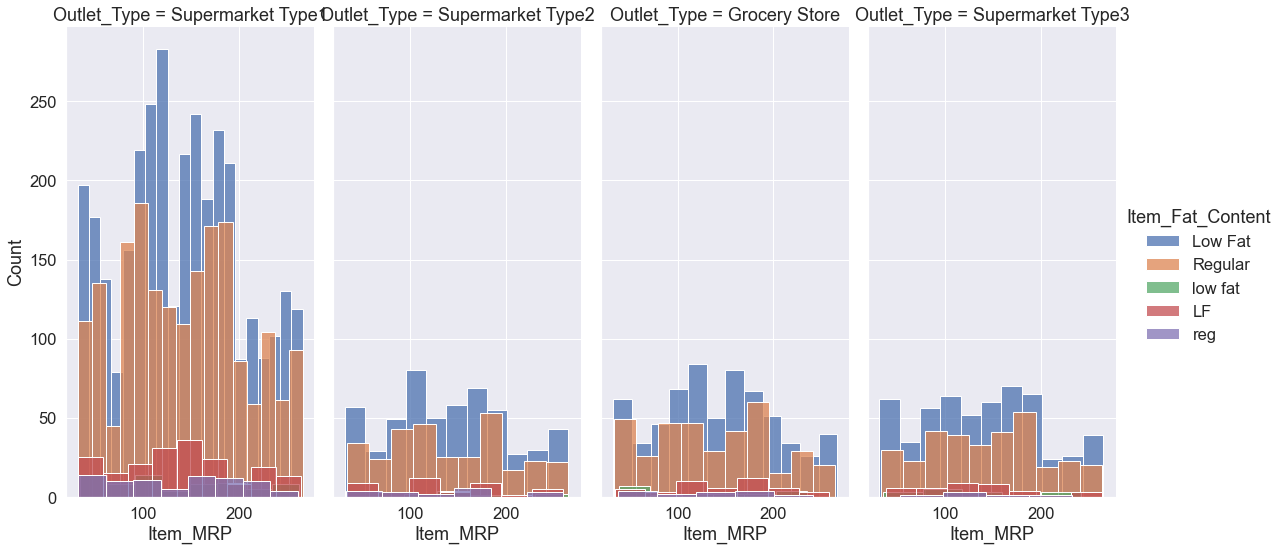

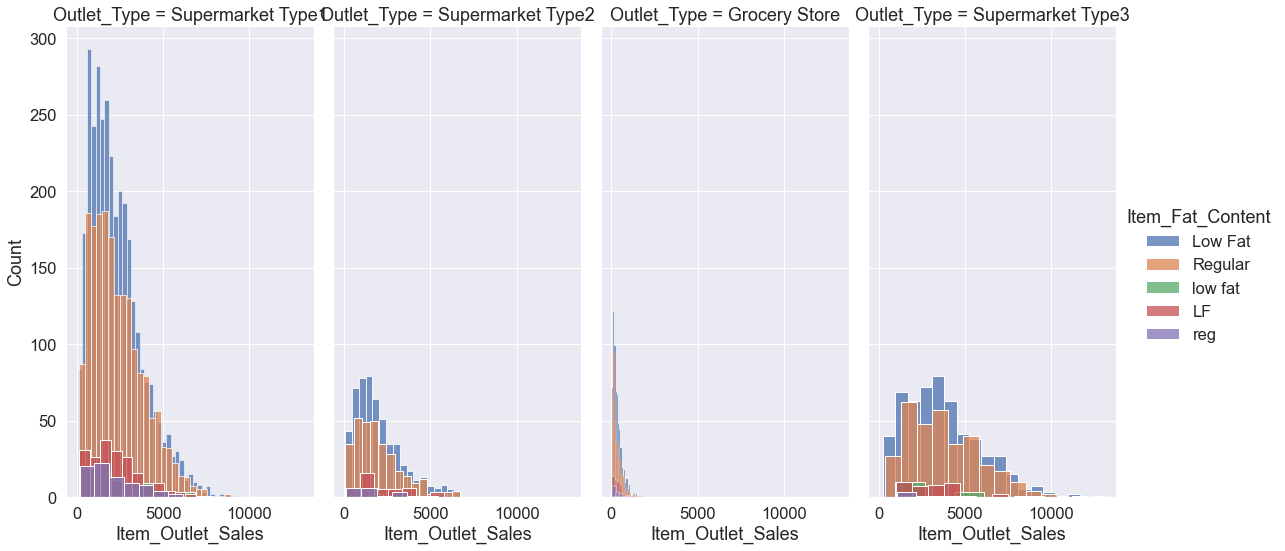

In [24]:

sns.set_theme(font_scale=1.5)
for col in train.drop('Item_Identifier',axis=1).loc[:,train.nunique()>40].columns:
    g=sns.FacetGrid(train, hue='Item_Fat_Content',col='Outlet_Type',height=8,aspect=0.5)
    g.map(sns.histplot,col)
    g.add_legend()
    plt.show()